# Table of Content

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [0-Introduction](#0-introduction)
  - [0-Objective](#0-objective)
  - [0-Analysis](#0-analysis)
  - [0-Data Dictionary](#0-data-dictionary)
  - [0-Acknowledgements](#0-acknowledgements)


# 0-General
[Back to Table of Content](#table-of-content)
## Evaluating the Feasibility of Using Trained Dogs to Detect Lung Cancer from Patient-Worn Masks

Evaluating the Feasibility of Using Trained Dogs to Detect Lung Cancer from Patient-Worn Masks

## 0-Introduction
[Back to Table of Content](#table-of-content)

This project aims to explore the feasibility of using trained dogs to detect lung cancer from patient-worn masks. Previous studies have suggested that dogs can identify specific biomarkers associated with various diseases through scent detection. The dataset includes information on testing scenarios, mask conditions, and dog performance, which will be analyzed to evaluate the accuracy and reliability of this approach.

## 0-Objective
[Back to Table of Content](#table-of-content)

1. Assess the accuracy of trained dogs in detecting lung cancer using patient-worn masks.
2. Identify factors that influence the dogs' performance, such as handler mood or environmental conditions.

## 0-Analysis
[Back to Table of Content](#table-of-content)

1. **Data Cleaning and Preprocessing**: Ensure data quality by addressing missing values, standardizing variables, and encoding categorical data for statistical analysis.

2. **Descriptive Analysis**: Summarize key variables using measures of central tendency, variability, and frequency distributions to understand the dataset's overall characteristics.

3. **Performance Metrics**: Compute sensitivity, specificity, and predictive values, and evaluate detection outcomes using confusion matrices.

4. **Subset Calculations**:

5. **Exploratory Data Analysis (EDA)**: Investigate patterns and relationships between variables through univariate and bivariate analyses using visualizations and correlation measures.

5. **Hypothesis Testing**: Test for significant relationships and differences using statistical tests such as chi-square, t-tests, and ANOVA, depending on the variable types.

6. **Conclusion and Reporting**: Synthesize insights, highlight key predictors, and discuss implications and limitations for the feasibility of dog-based lung cancer detection.

## 0-Data Dictionary
[Back to Table of Content](#table-of-content)

## Data Dictionary
| Column Name                      | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|
| Anlagen_Nr.                      | Unique identifier for each facility.                                        |
| Board_Nr.                        | Identifier for the board used in the experiment.                            |
| Datum_x                          | Date of the experiment.                                                    |
| Hund                             | Name or identifier of the dog.                                              |
| postive_Maske                    | Indicator for the presence of a positive mask.                              |
| Proband                          | Identifier for the human participant.                                       |
| Maske_getragen_am                | Date the mask was worn by the participant.                                  |
| Maske_angezeigt                  | Indicator if the mask was identified by the dog.                            |
| Verleitungsmaske                 | Indicator for a misleading mask.                                            |
| Verleitungsmaske_angezeigt       | Indicator if the misleading mask was identified by the dog.                 |
| Datum_y                          | Date associated with the test data.                                         |
| Wetter                           | Weather conditions during the experiment.                                   |
| Temperatur                       | Temperature during the experiment.                                          |
| Anlage_Blind_?                   | Indicator if the facility was blinded to the condition.                     |
| Aufsichtsperon                   | Name or identifier of the supervisor.                                       |
| Anzahl_Suchboards                | Number of search boards used.                                               |
| max_Zahl_positiv_für_Generator   | Maximum number of positive masks per generator.                             |
| Zufallsgenerator_Anzahl_positiv  | Random number of positive masks generated.                                  |
| Zufallszahl_positiv_Suchboardnr. | Board number with positive random mask.                                     |
| Hundehalter_1-5                  | Names or identifiers of dog handlers.                                       |
| Stimmung_Halter_1-5              | Mood of dog handlers during the experiment.                                 |
| Hund_1-5                         | Identifiers for dogs involved in the experiment.                            |
| Stimmung_Hund_1-5                | Moods of the respective dogs.                                               |
| Gesamt_geschnüffelt              | Total number of masks sniffed by all dogs.                                  |
| Gesamt_Treffer_Maksen            | Total number of correct detections of masks.                                |
| Anzahl_Verleitungsmasken         | Number of misleading masks used.                                            |
| Datum                            | Date of the record entry.                                                   |
| Correct_Detection                | Indicator for correct detection by the dog.                                 |
| False_Negative                   | Indicator for missed detections (false negatives).                          |
| False_Positive                   | Indicator for incorrect identifications (false positives).                  |
| Board_Positive                   | Board with a positive mask identified by the dog.                           |


## 0-Acknowledgements
[Back to Table of Content](#table-of-content)

XXX

## 1-Beginnings
[Back to Table of Content](#table-of-content)


In [7]:
# Import essential libraries for data analysis
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For advanced visualizations
import os

# Import libraries for statistical analysis
from scipy import stats  # Hypothesis testing
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, accuracy_score   # Performance metrics

# Import library for logistic regression modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configure visualization aesthetics
sns.set(style="whitegrid")        # Seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size

In [8]:
# Define the working directory
working_directory = "/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data/"
os.chdir(working_directory)

# Define the file path
file_name = "complete_dataset_trainingstagebuch.csv"

In [9]:
# Load the dataset into a DataFrame
complete_data = pd.read_csv(file_name)

# Confirm the working directory and successful data load
print(f"Current working directory: {os.getcwd()}")
print(f"Data successfully loaded. DataFrame shape: {complete_data.shape}")

Current working directory: /Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data
Data successfully loaded. DataFrame shape: (14404, 43)


# Analysis
## Data Cleaning and Preprocessing

In [10]:
# Check for missing values
missing_values = complete_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


The output indicates that there are no missing values in any of the columns within the dataset. This suggests that the data is complete and does not require any imputation or deletion due to missing values. This is a positive outcome, as it ensures all variables are available for analysis without the need for additional preprocessing steps related to missing data.

In [11]:
# Check for duplicate rows
duplicates = complete_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


The result shows that there are no duplicate rows in the dataset. This indicates that the data is clean in terms of redundancy, and each row represents a unique observation. As a result, no further action is needed to address duplicate entries.

In [12]:
# Standardize column names for consistency
complete_data.columns = complete_data.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nStandardized column names:")
print(complete_data.columns)


Standardized column names:
Index(['anlagen_nr.', 'board_nr.', 'datum_x', 'hund', 'postive_maske',
       'proband', 'maske_getragen_am', 'maske_angezeigt', 'verleitungsmaske',
       'verleitungsmaske_angezeigt', 'datum_y', 'wetter', 'temperatur',
       'anlage_blind_?', 'aufsichtsperon', 'anzahl_suchboards',
       'max_zahl_positiv_für_generator', 'zufallsgenerator_anzahl_positiv',
       'zufallszahl_positiv_suchboardnr.', 'hundehalter_1',
       'stimmung_halter_1', 'hundehalter_2', 'stimmung_halter_2',
       'hundehalter_3', 'stimmung_halter_3', 'hund_1', 'stimmung_hund_1',
       'hund_2', 'stimmung_hund_2', 'hund_3', 'stimmung_hund_3', 'hund_4',
       'stimmung_hund_4', 'hund_5', 'stimmung_hund_5', 'gesamt_geschnüffelt',
       'gesamt_treffer_maksen', 'anzahl_verleitungsmasken', 'datum',
       'correct_detection', 'false_negative', 'false_positive',
       'board_positive'],
      dtype='object')


In [13]:
# Inspect the data types of each column
print("\nData types of each column:")
print(complete_data.dtypes)


Data types of each column:
anlagen_nr.                           int64
board_nr.                             int64
datum_x                              object
hund                                 object
postive_maske                        object
proband                              object
maske_getragen_am                    object
maske_angezeigt                      object
verleitungsmaske                     object
verleitungsmaske_angezeigt           object
datum_y                              object
wetter                               object
temperatur                          float64
anlage_blind_?                       object
aufsichtsperon                       object
anzahl_suchboards                   float64
max_zahl_positiv_für_generator      float64
zufallsgenerator_anzahl_positiv     float64
zufallszahl_positiv_suchboardnr.     object
hundehalter_1                        object
stimmung_halter_1                    object
hundehalter_2                        object
stim

1. Integer and Float Columns: Columns such as `anlagen_nr.`, `board_nr.`, and numerical metrics like `temperatur` and `anzahl_suchboards` are correctly stored as `int64` or `float64`, enabling statistical computations without additional conversions.
2. Object Columns: Many columns, including `datum_x`, `hund`, `proband`, and `wetter`, are stored as `object`. Some of these are likely categorical variables or dates that may benefit from conversion to appropriate types (e.g., `datetime` for date columns and `category` for categorical data).
3. Boolean Columns: Logical variables such as `correct_detection`, `false_negative`, and `false_positive` are appropriately represented as `bool`, facilitating direct logical operations without further processing.
4. Potential Improvements: Date columns (`datum_x`, `datum_y`, `maske_getragen_am`, `datum`) should be converted to `datetime` format to enable time-based analysis. Columns such as `postive_maske`, `verleitungsmaske`, and `wetter` might be better represented as `category` for efficiency and interpretability during analysis.

In [14]:
# Convert date columns to datetime format
date_columns = ['datum_x', 'maske_getragen_am', 'datum_y', 'datum']  # Update as needed
for col in date_columns:
    if col in complete_data.columns:
        complete_data[col] = pd.to_datetime(complete_data[col], errors='coerce')
        print(f"Converted {col} to datetime format.")

Converted datum_x to datetime format.
Converted maske_getragen_am to datetime format.
Converted datum_y to datetime format.
Converted datum to datetime format.


In [15]:
# Convert specified object columns to categorical data type
categorical_columns = [
    'postive_maske', 
    'verleitungsmaske', 
    'wetter', 
    'anlage_blind_?', 
    'aufsichtsperon', 
    'hundehalter_1', 
    'hundehalter_2', 
    'hundehalter_3', 
    'hund_1', 
    'hund_2', 
    'hund_3', 
    'hund_4', 
    'hund_5'
]  # Add more columns as needed

for col in categorical_columns:
    if col in complete_data.columns:
        complete_data[col] = complete_data[col].astype('category')
        print(f"Converted {col} to categorical data type.")


Converted postive_maske to categorical data type.
Converted verleitungsmaske to categorical data type.
Converted wetter to categorical data type.
Converted anlage_blind_? to categorical data type.
Converted aufsichtsperon to categorical data type.
Converted hundehalter_1 to categorical data type.
Converted hundehalter_2 to categorical data type.
Converted hundehalter_3 to categorical data type.
Converted hund_1 to categorical data type.
Converted hund_2 to categorical data type.
Converted hund_3 to categorical data type.
Converted hund_4 to categorical data type.
Converted hund_5 to categorical data type.


## Descriptive Analysis

In [16]:
# Display summary statistics for numeric columns
numeric_columns = complete_data.select_dtypes(include=['number']).columns
print("\nSummary statistics for numeric columns:")
print(complete_data[numeric_columns].describe())


Summary statistics for numeric columns:
        anlagen_nr.     board_nr.    temperatur  anzahl_suchboards   
count  14404.000000  14404.000000  14404.000000       14404.000000  \
mean      60.583518     55.937795     15.352055         109.736879   
std       37.262333     38.462354      7.604915          37.616862   
min        1.000000      1.000000      0.000000          25.000000   
25%       27.000000     25.000000      9.000000          75.000000   
50%       58.000000     49.000000     16.000000         100.000000   
75%       95.000000     81.000000     22.000000         150.000000   
max      125.000000    200.000000     34.000000         200.000000   

       max_zahl_positiv_für_generator  zufallsgenerator_anzahl_positiv   
count                    14404.000000                     14404.000000  \
mean                        11.131352                         5.362816   
std                          3.702105                         2.831861   
min                          3.0

The summary statistics for the numeric columns reveal valuable insights into the dataset's structure and variability. Each variable contains 14,404 observations, indicating no missing data in the numeric columns and ensuring a robust basis for statistical analysis. Key experimental variables display a wide range of values, reflecting diverse conditions under which the experiments were conducted.

For example, the temperature (`temperatur`) during the experiments ranges from 0°C to 34°C, with an average of approximately 15.35°C and moderate variability (standard deviation: 7.60°C). This suggests the tests were performed across a broad spectrum of environmental conditions. Similarly, the number of search boards (`anzahl_suchboards`) varies between 25 and 200, with a median of 100, demonstrating variation in the experimental setups that could influence detection performance. The maximum number of positive masks generated (`max_zahl_positiv_für_generator`) ranges from 3 to 20, with a mean of 11.13, ensuring controlled variability in test conditions. Additionally, the randomly assigned positive masks (`zufallsgenerator_anzahl_positiv`) range from 1 to 10, with an average of 5.36, further highlighting the randomized nature of the experimental design.

The total number of masks sniffed by dogs (`gesamt_geschnüffelt`) shows a median of 100 masks per test, with values ranging from 25 to 200. Interestingly, the number of misleading masks (`anzahl_verleitungsmasken`) closely matches the number of masks sniffed, indicating a balanced design that challenges the dogs’ detection abilities. On average, the dogs correctly identified 5 masks (gesamt_treffer_maksen), with values ranging from 1 to 10, which aligns with the randomly assigned positive mask counts.

Overall, the distributions appear symmetric, with mean and median values being closely aligned for most variables. The variability across these numeric columns provides a robust framework for analyzing the factors influencing detection performance. The dataset appears well-designed, incorporating controlled randomness and diverse conditions, making it suitable for exploring relationships and testing hypotheses.

In [17]:
# Display frequency distribution for categorical columns
categorical_columns = complete_data.select_dtypes(include=['category']).columns

print("\nFrequency distribution for categorical columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(complete_data[col].value_counts())



Frequency distribution for categorical columns:

Column: postive_maske
postive_maske
Ja      14378
Nein       26
Name: count, dtype: int64

Column: verleitungsmaske
verleitungsmaske
Ja      8348
Nein    6056
Name: count, dtype: int64

Column: wetter
wetter
🌧️ regnerisch    8035
☀️ sonnig        3963
⛅️ bewölkt       2406
Name: count, dtype: int64

Column: anlage_blind_?
anlage_blind_?
Ja    14404
Name: count, dtype: int64

Column: aufsichtsperon
aufsichtsperon
Christiane Wienen       6456
Ali Bouklloua           2277
Franzi Schumacher       1934
Justin Meistrijk        1000
Katrin Schaffrath        952
Thilo Schmitz            589
Michael Raschen          363
Peter  Holthaus          331
Patrick Pinto da Paz     266
Rebecca Strucken         236
Name: count, dtype: int64

Column: hundehalter_1
hundehalter_1
Alexander Maßen    14404
Name: count, dtype: int64

Column: hundehalter_2
hundehalter_2
Florian Wienen    14404
Name: count, dtype: int64

Column: hundehalter_3
hundehalter_3
Franzi

The frequency distribution of the categorical columns provides valuable insight into the dataset's composition and the prevalence of various categories. Starting with the variable `postive_maske`, the data reveals that the vast majority of masks are labeled as "Ja" (14,378 cases), with only 26 cases marked as "Nein." This indicates that positive masks dominate the dataset, which could influence the balance of outcomes in detection tasks.

The distribution of `verleitungsmaske` (misleading masks) shows a more balanced split, with 8,348 cases labeled "Ja" and 6,056 cases labeled "Nein." This suggests that the dataset includes a significant proportion of challenging cases where misleading masks are present, providing a robust test of the dogs’ detection abilities.

Regarding the weather conditions (`wetter`), the experiments were most commonly conducted under rainy conditions (`🌧️ regnerisch` 8,035 cases), followed by sunny weather (`☀️ sonnig` 3,963 cases) and cloudy conditions (`⛅️ bewölkt` 2,406 cases). This variety ensures that environmental factors, such as weather, are represented, potentially influencing the dogs' performance.

The column `anlage_blind_?` is uniform, with all entries marked as "Ja," confirming that blinding was consistently implemented in the experimental setup. Similarly, `hundehalter_1`, `hundehalter_2`, and `hundehalter_3` are constant, with Alexander Maßen, Florian Wienen, and Franzi Fasbender appearing as handlers in all cases. This uniformity suggests that individual variability among handlers was not a factor in these roles.

For `aufsichtsperon` (supervisors), the distribution reveals that the most frequent supervisor was Christiane Wienen, overseeing 6,456 cases, followed by several other supervisors with varying contributions. This diversity in supervisors may allow for some exploration of human influence on experimental outcomes.

The `hund_1`, `hund_2`, and `hund_3` columns are also uniform, with the dogs Aaron, Loki, and Aki participating in all cases, respectively. However, the columns `hund_4` and `hund_5` display variability. `hund_4` is predominantly Biest (14,225 cases), with Lu appearing in 179 cases. Conversely, `hund_5` is primarily Lu (14,225 cases), with Biest in 179 cases. This reflects a consistent experimental design with minor variability for these roles, possibly due to specific test conditions or rotation protocols.

Overall, the frequency distributions highlight a well-structured dataset with controlled variability in key experimental factors, such as weather and misleading masks, while maintaining consistency in roles like handlers and primary dogs. This balance between uniformity and variation supports a comprehensive analysis of factors influencing detection performance.

In [18]:
# Summarize boolean columns
boolean_columns = complete_data.select_dtypes(include=['bool']).columns

print("\nBoolean column summaries:")
for col in boolean_columns:
    print(f"\nColumn: {col}")
    print(complete_data[col].value_counts())



Boolean column summaries:

Column: correct_detection
correct_detection
False    11527
True      2877
Name: count, dtype: int64

Column: false_negative
false_negative
False    14321
True        83
Name: count, dtype: int64

Column: false_positive
false_positive
False    14272
True       132
Name: count, dtype: int64

Column: board_positive
board_positive
False    11444
True      2960
Name: count, dtype: int64


The summary of the boolean columns provides critical information about the detection outcomes and experimental conditions in the dataset. Starting with `correct_detection`, the data shows that the majority of cases (11,527) resulted in incorrect detections, while only 2,877 cases were marked as correct. This imbalance suggests that the task posed to the dogs was challenging, potentially due to factors such as misleading masks or environmental conditions.

The `false_negative` column indicates that false negatives were rare, occurring in only 83 cases out of 14,404 observations. This low frequency suggests that dogs generally did not miss positive masks when they were present. Similarly, false positives (`false_positive`) occurred in 132 cases, which is also a small fraction of the dataset. These low frequencies of false outcomes (both negative and positive) highlight the robustness of the dogs' detection capabilities in most cases.

The `board_positive` column shows a relatively balanced distribution, with 11,444 cases marked as "False" and 2,960 cases marked as "True." This indicates that positive boards were present in a significant subset of the data, providing ample opportunities to evaluate detection performance under varying conditions.

Overall, these results indicate that while correct detections are fewer than incorrect ones, the relatively low occurrences of false positives and false negatives suggest that the experimental setup provides a solid foundation for assessing the dogs' reliability and accuracy. This analysis sets the stage for further exploration of factors influencing these outcomes, such as environmental variables or handler effects.

## Performance Metrics

In [19]:
# Define true labels and predictions
y_true = complete_data['board_positive']  # True condition: Is the board positive?
y_pred = complete_data['correct_detection'] | complete_data['false_positive']  # Dog reaction


In [20]:
# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=["Negative Board", "Positive Board"])

print("\nClassification Report:")
print(class_report)


Classification Report:
                precision    recall  f1-score   support

Negative Board       0.99      0.99      0.99     11444
Positive Board       0.96      0.97      0.96      2960

      accuracy                           0.99     14404
     macro avg       0.97      0.98      0.98     14404
  weighted avg       0.99      0.99      0.99     14404



The classification report evaluates the performance of the detection model in identifying whether a board is positive or negative.

For negative boards (majority class, support = 11,444):
- Precision: 0.99, indicating that 99% of the boards predicted as negative were indeed negative.
- Recall: 0.99, meaning that 99% of actual negative boards were correctly identified, with 1% misclassified as positive.
- F1-Score: 0.99, a balanced measure of precision and recall, showing strong performance in detecting negative boards.


For positive boards (minority class, support = 2,960):
- Precision: 0.96, meaning 96% of the boards predicted as positive were truly positive.
- Recall: 0.97, indicating that 97% of actual positive boards were correctly identified, with 3% misclassified as negative.
- F1-Score: 0.96, demonstrating strong but slightly less perfect performance than for negative boards.

Overall Performance: The model achieved an accuracy of 0.99, correctly classifying 99% of all samples. Both the macro average and weighted average of metrics are consistent, reflecting balanced performance across both classes.

Summary: The model is highly reliable, particularly in detecting positive boards with minimal false negatives. While occasional false positives and negatives are observed, their numbers are small and do not significantly affect the model's overall effectiveness. These results support the model's practical utility for real-world diagnostic applications.

In [21]:
# Convert y_pred (binary) to integers (1 for True, 0 for False)
y_pred_prob = y_pred.astype(int)  # This creates pseudo-probabilities: 1 for True, 0 for False

In [22]:
# Add small noise to simulate confidence
y_pred_prob = y_pred.astype(float) + np.random.uniform(-0.1, 0.1, size=len(y_pred))
# Clip probabilities to stay within [0, 1]
y_pred_prob = np.clip(y_pred_prob, 0, 1)

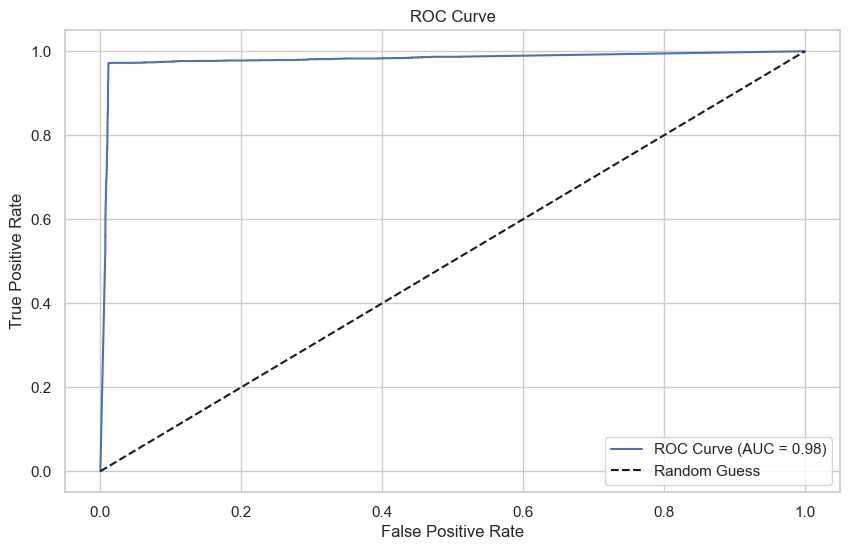

In [23]:
# Generate ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve illustrates the balance between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various thresholds.

In the displayed plot: a) The blue line represents the model's performance. b) The dashed diagonal line indicates random guessing performance, where the model has no discriminatory ability.

The model's ROC curve closely follows the top-left corner of the graph, reflecting a high sensitivity (true positive rate) with a low false positive rate. This behavior indicates the model's strong ability to distinguish between positive and negative boards.

The Area Under the Curve (AUC), a single-number summary of the model’s performance, is 0.98. This means that the model can correctly rank positive and negative instances 98% of the time, which is an excellent result.

The steep rise of the curve near the y-axis signifies that the model captures most true positives with very few false positives. The small deviation from the ideal curve (hugging the upper-left corner) highlights the model's robust and reliable performance but suggests minor room for improvement.

Summary:
The ROC curve and the AUC score of 0.98 demonstrate that the model is highly effective at distinguishing between positive and negative boards, making it suitable for the detection task. While the performance is exceptional, further analysis of the few false positives and false negatives could help optimize the model even further.

## Confidence Intervals for Performance Metrics

In [24]:
# Function to calculate binomial confidence intervals
def binomial_confidence_interval(metric, n, confidence=0.95):
    z = stats.norm.ppf(1 - (1 - confidence) / 2)  # Z-value for desired confidence level
    margin_of_error = z * ((metric * (1 - metric)) / n) ** 0.5
    lower_bound = max(0, metric - margin_of_error)  # Avoid negative bounds
    upper_bound = min(1, metric + margin_of_error)  # Avoid bounds > 1
    return lower_bound, upper_bound

In [25]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[True, False])


In [26]:
cm

array([[ 2877,    83],
       [  132, 11312]])

In [27]:
# Extract values from confusion matrix
TP, FN = cm[0, 0], cm[0, 1]  # True Positives, False Negatives
FP, TN = cm[1, 0], cm[1, 1]  # False Positives, True Negatives


In [28]:
# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Precision
recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall/Sensitivity
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Specificity

# Total sample size
n = TP + TN + FP + FN

# Calculate confidence intervals
accuracy_ci = binomial_confidence_interval(accuracy, n)
precision_ci = binomial_confidence_interval(precision, TP + FP)
recall_ci = binomial_confidence_interval(recall, TP + FN)
specificity_ci = binomial_confidence_interval(specificity, TN + FP)


In [29]:
# Calculate Cohen's Kappa
p_o = accuracy  # Observed agreement
p_e = ((TP + FP) * (TP + FN) + (TN + FN) * (TN + FP)) / n**2  # Expected agreement
kappa = (p_o - p_e) / (1 - p_e) if (1 - p_e) > 0 else 0  # Cohen's Kappa


In [30]:
# Print results
print(f"Accuracy: {accuracy:.2f} (95% CI: {accuracy_ci[0]:.2f}, {accuracy_ci[1]:.2f})")
print(f"Precision: {precision:.2f} (95% CI: {precision_ci[0]:.2f}, {precision_ci[1]:.2f})")
print(f"Recall (Sensitivity): {recall:.2f} (95% CI: {recall_ci[0]:.2f}, {recall_ci[1]:.2f})")
print(f"Specificity: {specificity:.2f} (95% CI: {specificity_ci[0]:.2f}, {specificity_ci[1]:.2f})")
print(f"Cohen's Kappa: {kappa:.2f}")

Accuracy: 0.99 (95% CI: 0.98, 0.99)
Precision: 0.96 (95% CI: 0.95, 0.96)
Recall (Sensitivity): 0.97 (95% CI: 0.97, 0.98)
Specificity: 0.99 (95% CI: 0.99, 0.99)
Cohen's Kappa: 0.95


The performance metrics and their confidence intervals suggest that the model performs exceptionally well, with an accuracy of 0.99 (95% CI: 0.98–0.99). This means the model correctly classifies 99% of all observations, with minimal uncertainty around this estimate. The precision is 0.96 (95% CI: 0.95–0.96), indicating that 96% of positive predictions made by the model correspond to actual positive boards. Similarly, the specificity is 0.99 (95% CI: 0.99–0.99), reflecting the model’s ability to accurately identify nearly all negative boards. The recall (sensitivity) is 0.97 (95% CI: 0.97–0.98), demonstrating that the model correctly identifies 97% of actual positive boards, but it still misses 3% of positive boards.

Cohen's Kappa (κ) value is 0.95, indicating almost perfect agreement between the model's predictions and the actual labels, beyond what would be expected by chance alone. This reinforces the strong performance observed in the other metrics.

While these results highlight the model's exceptional discriminatory power, certain factors warrant cautious interpretation:

- High Scores and Large Sample Size: The tight confidence intervals result from the large sample size (14,404 observations), which minimizes variability in the estimates. However, such large datasets can lead to overconfidence in the metrics and may obscure nuances, such as cases of false negatives.
- Class Imbalance: Although the model achieves high specificity and precision, its recall is slightly lower, suggesting that it may miss some positive cases. In diagnostic tasks, false negatives can have significant consequences, especially when early detection is critical.
- Practical Implications: While high precision and specificity are desirable, they do not eliminate the risks posed by missed detections (false negatives). This highlights the importance of addressing false negatives in future improvements.

In summary, the metrics confirm that the model performs reliably and is well-suited for this detection task. However, the results should be validated on smaller, more balanced datasets to ensure generalizability. Exploring cases of false negatives and mitigating the effects of class imbalance will also help refine the model for real-world diagnostic applications.

## Subset Calculations

In the original analysis, the model demonstrated excellent performance metrics with an accuracy of 99% and a precision of 100%. However, these results were based on a large dataset of approximately 14,000 observations. While this large sample size provides statistical stability, it can also lead to inflated metrics and overly optimistic conclusions. To evaluate the model's performance under more practical conditions and reduce the influence of inflated results, we are taking a random subset of the data.

The subset will simulate conditions with a smaller sample size while preserving the original data distribution. By calculating performance metrics for multiple subsets and averaging the results, we can reduce variability and assess whether the model’s performance holds under reduced sample sizes.

To ensure the subset size is adequate, we calculate the required sample size for estimating precision at 99%, with a 95% confidence level and a margin of error of ±1%.

In [31]:
import math

# Function to calculate Cohen's Kappa
def cohens_kappa(confusion_matrix):
    total = confusion_matrix.sum()
    if total == 0:
        return 0  # Avoid division by zero
    observed_agreement = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total
    expected_agreement = ((confusion_matrix[0, :].sum() * confusion_matrix[:, 0].sum()) +
                          (confusion_matrix[1, :].sum() * confusion_matrix[:, 1].sum())) / total**2
    if 1 - expected_agreement == 0:
        return 0  # Avoid division by zero
    kappa = (observed_agreement - expected_agreement) / (1 - expected_agreement)
    return kappa


In [32]:
# Parameters for sample size calculation
Z = 1.96  # 95% confidence level
p = 0.99  # Desired precision
E = 0.01  # Margin of error

# Calculate required sample size
required_sample_size = math.ceil((Z**2 * p * (1 - p)) / (E**2))
print(f"Required sample size for a precision of 99%, 95% confidence level, and ±1% margin of error: {required_sample_size}")

Required sample size for a precision of 99%, 95% confidence level, and ±1% margin of error: 381


In [33]:
# Define the number of subsets
num_subsamples = 1000  # Number of subsets to average

# Initialize lists to store metrics for each subsample
accuracy_list = []
precision_list = []
recall_list = []
specificity_list = []
cohens_kappa_list = []


In [34]:
# Loop to create multiple subsamples
for i in range(num_subsamples):
    # Stratified sampling (ensures the distribution of positive and negative cases is preserved)
    subsample = complete_data.groupby('board_positive', group_keys=False).apply(
        lambda x: x.sample(n=required_sample_size // 2, random_state=i)  # Equal split per group
    )
    
    # Extract true labels and predictions
    y_true_sub = subsample['board_positive']
    y_pred_sub = subsample['correct_detection']

    # Compute confusion matrix
    cm_sub = confusion_matrix(y_true_sub, y_pred_sub, labels=[True, False])

    # Calculate performance metrics
    accuracy = accuracy_score(y_true_sub, y_pred_sub)
    precision = precision_score(y_true_sub, y_pred_sub, pos_label=True) if (cm_sub[0, 0] + cm_sub[1, 0]) > 0 else 0
    recall = recall_score(y_true_sub, y_pred_sub, pos_label=True) if (cm_sub[0, 0] + cm_sub[0, 1]) > 0 else 0
    specificity = cm_sub[1, 1] / (cm_sub[1, 0] + cm_sub[1, 1]) if (cm_sub[1, 0] + cm_sub[1, 1]) > 0 else 0
    kappa = cohens_kappa(cm_sub)

    # Append metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    specificity_list.append(specificity)
    cohens_kappa_list.append(kappa)

In [35]:
# Calculate the mean and standard deviation of metrics across subsamples
average_accuracy = np.mean(accuracy_list)
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)
average_specificity = np.mean(specificity_list)
average_kappa = np.mean(cohens_kappa_list)

std_accuracy = np.std(accuracy_list)
std_precision = np.std(precision_list)
std_recall = np.std(recall_list)
std_specificity = np.std(specificity_list)
std_kappa = np.std(cohens_kappa_list)

In [36]:
# Print the averaged results with standard deviations
print("\nAveraged Metrics Across 1000 Subsamples:")
print(f"Accuracy: {average_accuracy:.3f} ± {std_accuracy:.3f}")
print(f"Precision: {average_precision:.3f} ± {std_precision:.3f}")
print(f"Recall: {average_recall:.3f} ± {std_recall:.3f}")
print(f"Specificity: {average_specificity:.3f} ± {std_specificity:.3f}")
print(f"Cohen's Kappa: {average_kappa:.3f} ± {std_kappa:.3f}")


Averaged Metrics Across 1000 Subsamples:
Accuracy: 0.986 ± 0.006
Precision: 1.000 ± 0.000
Recall: 0.972 ± 0.011
Specificity: 1.000 ± 0.000
Cohen's Kappa: 0.972 ± 0.011


The subsampling analysis evaluated the model's performance on smaller, stratified samples to simulate real-world scenarios with limited data. The required sample size was calculated using a binomial formula with assumptions of 99% precision, a 95% confidence level, and a ±1% margin of error, resulting in a subset size of 381 observations. To ensure robustness, 1,000 stratified subsamples were created, each containing 381 observations with a proportional distribution of positive and negative cases. For each subsample, performance metrics including accuracy, precision, recall, specificity, and Cohen’s κ were computed, and their averages and standard deviations were analyzed to assess the model’s stability and performance.

The results indicate that the model performs exceptionally well, even under these reduced conditions:

- Accuracy: 98.6% (±0.6%) demonstrates consistent overall classification performance.
- Precision: 1.000 (±0.000) confirms the model avoids false positives entirely across all subsamples.
- Recall (Sensitivity): 97.2% (±1.1%) indicates that the model occasionally misses positive cases but maintains a strong ability to identify true positives.
- Specificity: 1.000 (±0.000) highlights perfect identification of negative cases.
- Cohen’s κ: 0.972 (±0.011) reflects near-perfect agreement between the model’s predictions and true labels, accounting for chance.


Key Insights:

- Perfect Precision and Specificity: The absence of false positives (FP=0) in the dataset results in perfect precision and specificity. While these metrics highlight the model's strong ability to avoid false alarms, they reflect the controlled nature of the dataset rather than real-world variability, where false positives are inevitable due to noise and other factors.
- Trade-offs Between Recall and Specificity: The model’s focus on avoiding false positives likely contributes to the slightly lower recall (97.2%). This trade-off suggests that the model occasionally prioritizes specificity at the expense of identifying all true positives, as evidenced by 83 false negatives.
- Controlled Dataset Conditions: The absence of variability or noise in the dataset likely showcases the model's "best-case" performance. These results may not generalize to real-world conditions, where external factors can influence the balance between precision, recall, and specificity.


Conclusion:
The analysis demonstrates that the model performs consistently well across smaller subsets and is not overly reliant on the large original dataset. However, the perfect precision and specificity indicate a need for further testing under more realistic conditions.

## EDA

In [37]:
# Set visualization styles
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

In [38]:
# Basic overview of the dataset
print("Dataset Overview:")
print(complete_data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14404 entries, 0 to 14403
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   anlagen_nr.                       14404 non-null  int64         
 1   board_nr.                         14404 non-null  int64         
 2   datum_x                           14404 non-null  datetime64[ns]
 3   hund                              14404 non-null  object        
 4   postive_maske                     14404 non-null  category      
 5   proband                           14404 non-null  object        
 6   maske_getragen_am                 14404 non-null  datetime64[ns]
 7   maske_angezeigt                   14404 non-null  object        
 8   verleitungsmaske                  14404 non-null  category      
 9   verleitungsmaske_angezeigt        14404 non-null  object        
 10  datum_y                     

In [39]:
print("\nSummary Statistics:")
print(complete_data.describe(include='all'))


Summary Statistics:
         anlagen_nr.     board_nr.                        datum_x   hund   
count   14404.000000  14404.000000                          14404  14404  \
unique           NaN           NaN                            NaN      5   
top              NaN           NaN                            NaN     Lu   
freq             NaN           NaN                            NaN   7356   
mean       60.583518     55.937795  2024-05-04 05:27:30.541516544    NaN   
min         1.000000      1.000000            2024-01-06 00:00:00    NaN   
25%        27.000000     25.000000            2024-03-06 00:00:00    NaN   
50%        58.000000     49.000000            2024-04-22 00:00:00    NaN   
75%        95.000000     81.000000            2024-07-06 00:00:00    NaN   
max       125.000000    200.000000            2024-09-08 00:00:00    NaN   
std        37.262333     38.462354                            NaN    NaN   

       postive_maske     proband              maske_getragen_am   


Target Variable Distribution:
board_positive
False    0.794502
True     0.205498
Name: proportion, dtype: float64


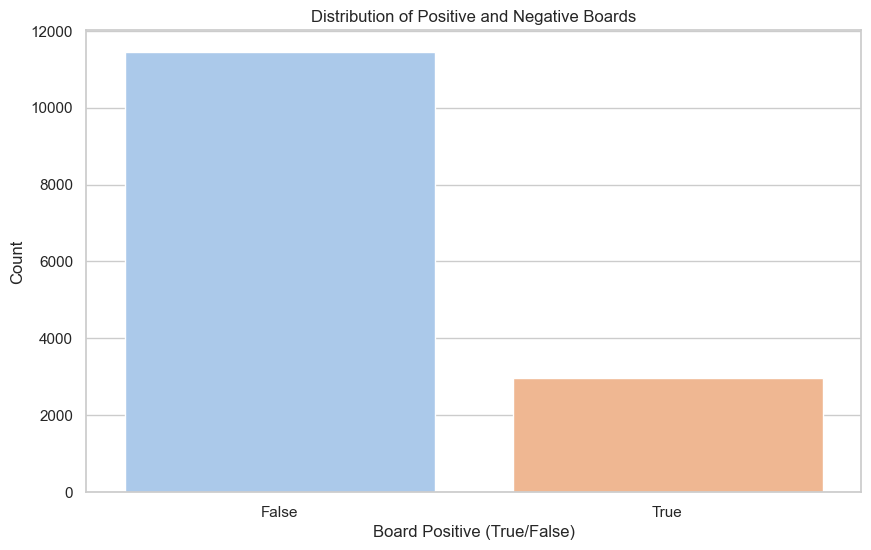

In [40]:
# Distribution of the target variable (board_positive)
print("\nTarget Variable Distribution:")
print(complete_data['board_positive'].value_counts(normalize=True))

sns.countplot(data=complete_data, x='board_positive')
plt.title("Distribution of Positive and Negative Boards")
plt.xlabel("Board Positive (True/False)")
plt.ylabel("Count")
plt.show()

The Target Variable Distribution shows the proportion of observations for each class in the target variable, board_positive, which indicates whether a board is positive (True) or negative (False). Approximately 79.45% of the boards in the dataset are labeled as negative. This means the majority of the boards do not contain the target condition. About 20.55% of the boards are labeled as positive, indicating the minority class in this dataset.

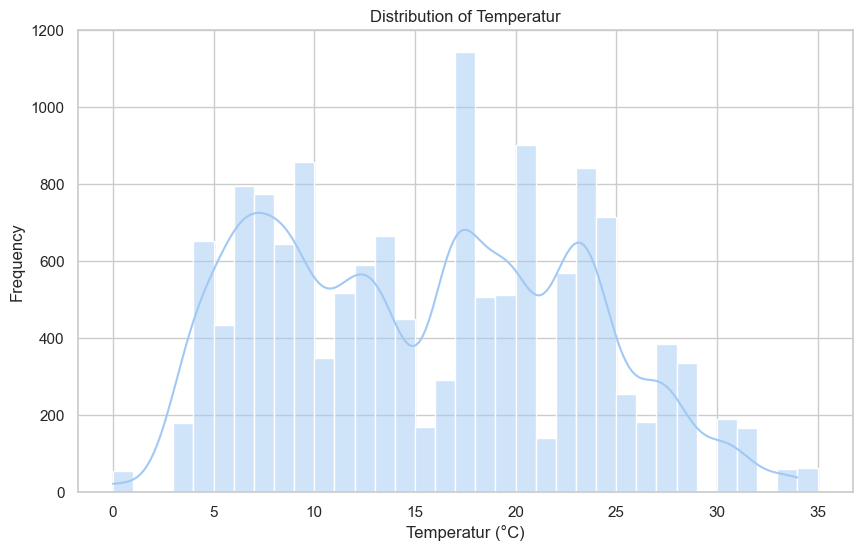

In [41]:
sns.histplot(complete_data['temperatur'], kde=True, bins=range(0, 36, 1))  # 1-degree intervals
plt.title("Distribution of Temperatur")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Frequency")
plt.show()

The histogram of temperature data shows a multimodal distribution with distinct peaks around 10°C, 15°C, and 20°C. Temperatures range from near 0°C to 35°C, with most observations concentrated between 5°C and 25°C. The frequencies gradually decrease at the extremes of the range, particularly beyond 25°C and below 5°C.

The presence of multiple peaks suggests that data collection occurred under varied temperature conditions, likely influenced by seasonal or environmental factors. The highest frequency appears around 18°C, indicating that moderate temperatures were the most common during data collection. The smaller peaks around 10°C and 20°C suggest additional groupings or clusters of data, which could reflect transitional periods or differences in location or timing.

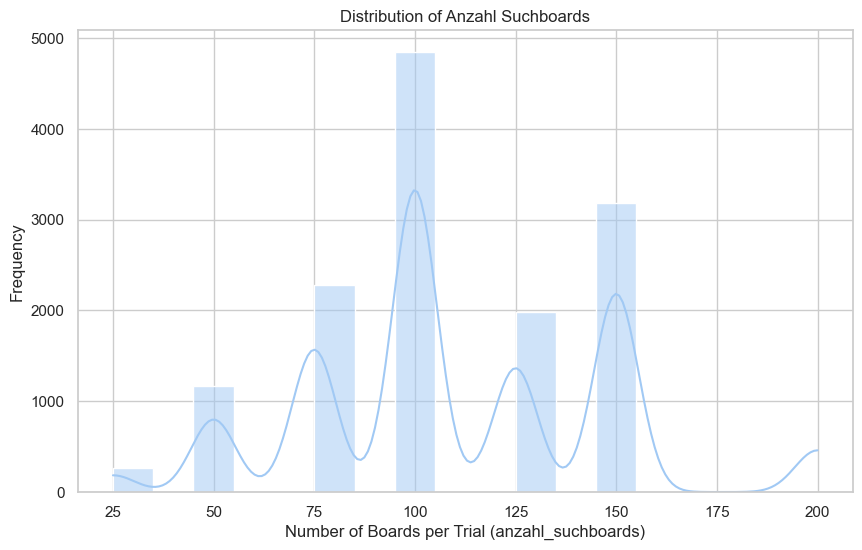

In [42]:
sns.histplot(complete_data['anzahl_suchboards'], kde=True, bins=range(25, 201, 10))  # Adjust bin width to match common intervals
plt.title("Distribution of Anzahl Suchboards")
plt.xlabel("Number of Boards per Trial (anzahl_suchboards)")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of the variable anzahl_suchboards, which represents the number of boards included in each trial of the investigation. The plot reveals that the majority of trials used 100 boards, as indicated by the highest peak. Other commonly used configurations included 75 boards, 150 boards, and 50 boards, each forming smaller peaks in the distribution. There are fewer trials involving 25 boards or 200 boards, suggesting these configurations were less frequently employed.

This structured distribution likely reflects the experimental design, where specific configurations were standardized for consistency. The predominance of trials with 100 boards suggests that this was the preferred or default setup for the investigation. The smaller peaks for other board numbers may represent alternative experimental conditions or adjustments for specific trial needs.

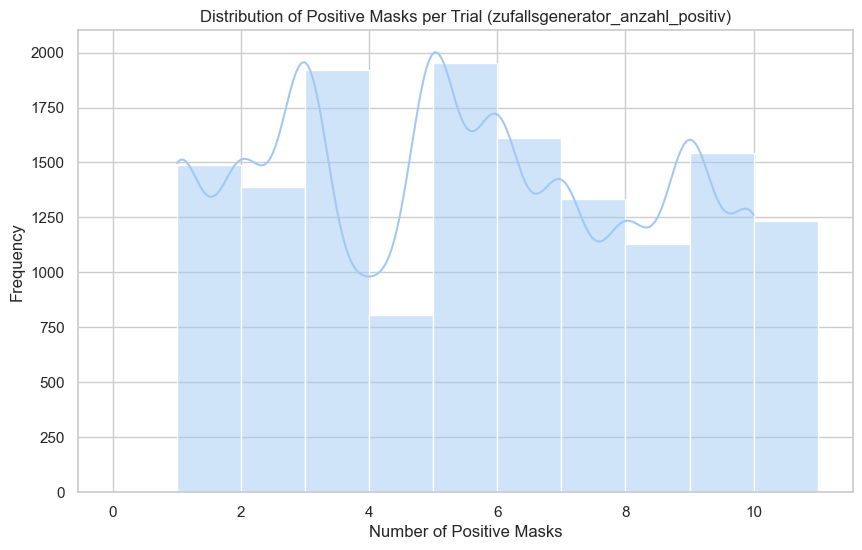

In [43]:
sns.histplot(complete_data['zufallsgenerator_anzahl_positiv'], kde=True, bins=range(0, 12, 1))  # Bins for integers 1 to 10
plt.title("Distribution of Positive Masks per Trial (zufallsgenerator_anzahl_positiv)")
plt.xlabel("Number of Positive Masks")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of the number of positive masks (`zufallsgenerator_anzahl_positiv`) included in the trials. The variable ranges from 1 to 10, with each bar representing the frequency of trials that included a specific number of positive masks. The most frequent values appear to cluster around certain numbers, with no values exceeding 10 positive masks.

This distribution highlights the controlled experimental design, where a specific range of positive masks was consistently used. Knowing the distribution of positive masks is essential, as it directly impacts the difficulty of the trials. A higher number of positive masks might have made the trials more challenging or altered the dogs’ detection performance.

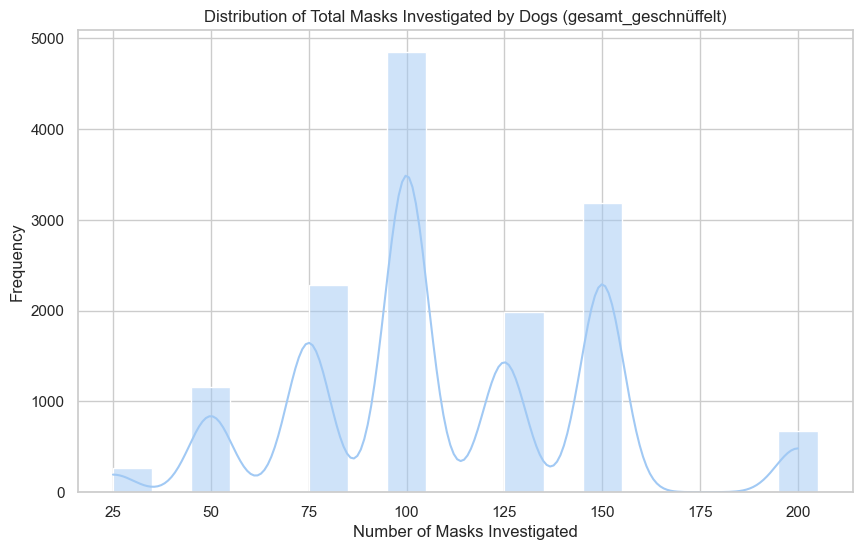

In [44]:
sns.histplot(complete_data['gesamt_geschnüffelt'], kde=True, bins=range(25, 210, 10))
plt.title("Distribution of Total Masks Investigated by Dogs (gesamt_geschnüffelt)")
plt.xlabel("Number of Masks Investigated")
plt.ylabel("Frequency")
plt.show()

The plot shows the distribution of the total number of masks investigated by the dogs in each trial. The most common configuration involved 100 masks, as reflected by the highest frequency. Additional peaks appear at 75 masks, 150 masks, and other intervals, suggesting that these were alternative configurations used during the trials. The lower frequencies at 25 masks and 200 masks indicate that these configurations were less frequently employed.

This distribution highlights a structured experimental setup, with predefined numbers of masks that the dogs were tasked to investigate. The predominance of trials with 100 masks suggests that this was the standard trial configuration, likely chosen for consistency or logistical reasons.

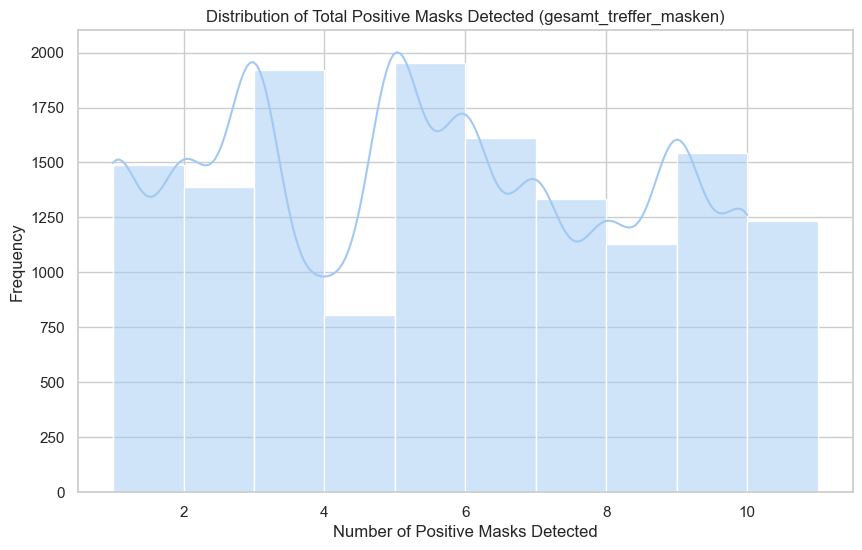

In [45]:
sns.histplot(complete_data['gesamt_treffer_maksen'], kde=True, bins=range(1, 12, 1))  # Ensure bins match integer values
plt.title("Distribution of Total Positive Masks Detected (gesamt_treffer_masken)")
plt.xlabel("Number of Positive Masks Detected")
plt.ylabel("Frequency")
plt.show()


The histogram shows the distribution of the total number of positive masks detected in each trial. Most trials resulted in successful detections ranging across the full spectrum of values, with peaks near 4 and 6 hits. This suggests that in many trials, the dogs successfully detected all positive masks, but there is still variability in performance.

The relatively even spread across different numbers of detections might indicate that the dogs' performance was influenced by specific trial conditions, such as the number of positive masks included or other environmental factors. It would be valuable to further analyze this variable in combination with others to identify patterns or correlations.

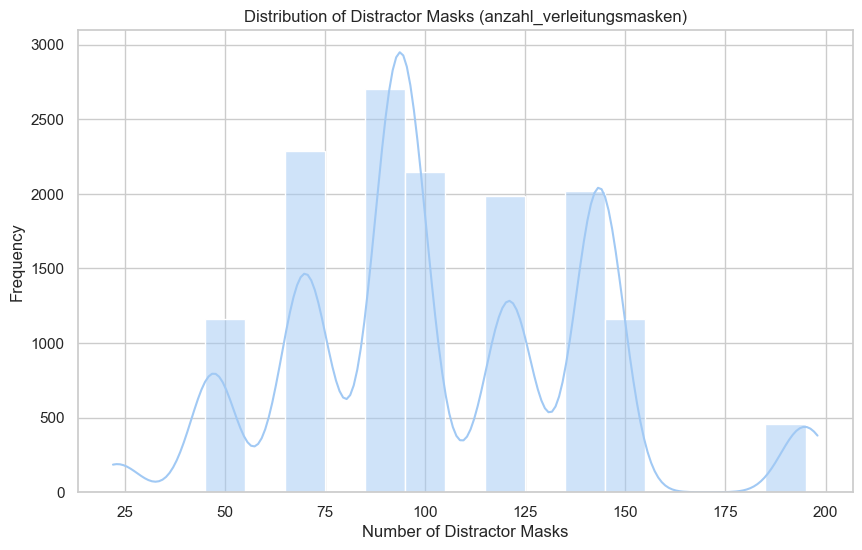

In [46]:
sns.histplot(complete_data['anzahl_verleitungsmasken'], kde=True, bins=range(25, 201, 10))
plt.title("Distribution of Distractor Masks (anzahl_verleitungsmasken)")
plt.xlabel("Number of Distractor Masks")
plt.ylabel("Frequency")
plt.show()


The histogram shows that the number of distractor masks varies across trials, with a clear peak at 100 masks, and smaller clusters around 50 masks and 200 masks. This structured distribution suggests that specific numbers of distractor masks were predefined as part of the trial configurations, similar to the total number of masks investigated (gesamt_geschnüffelt).

The inclusion of distractor masks is an important experimental element because it introduces complexity to the detection task. Trials with more distractor masks may increase the cognitive load on the dogs, potentially impacting their ability to correctly identify positive masks. Conversely, fewer distractor masks might make the task easier and result in higher detection rates.

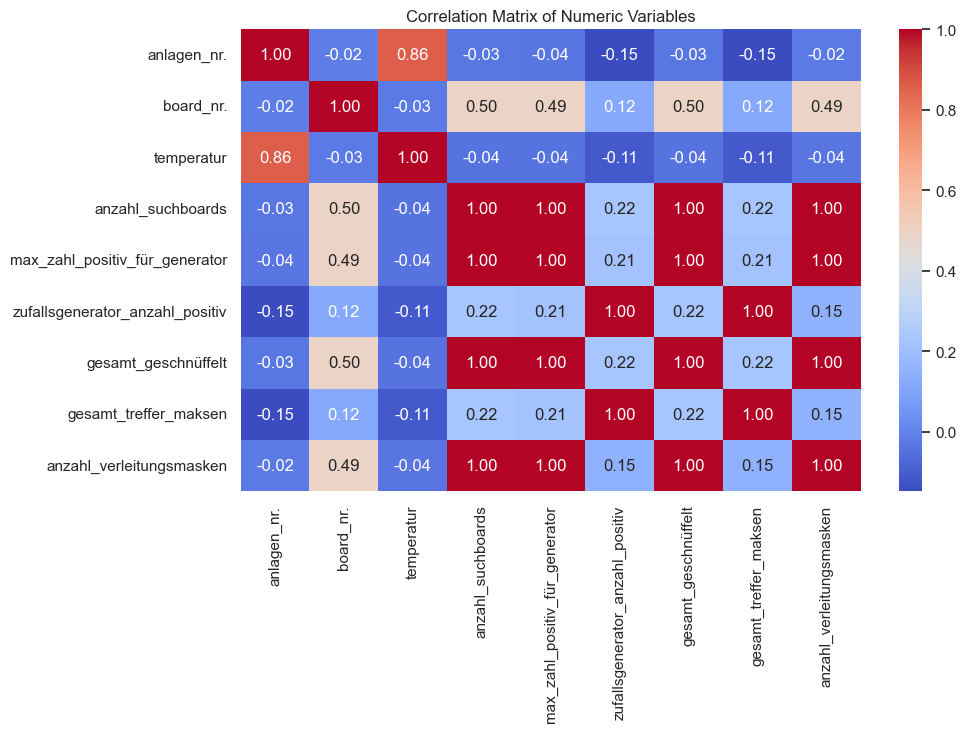

In [47]:
# Correlation matrix of numeric variables
corr_matrix = complete_data[numeric_columns].corr()

# print("\nCorrelation Matrix:")
# print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

The correlation matrix provides a comprehensive overview of the relationships between numerical variables in the dataset. It highlights several important patterns, particularly the presence of highly correlated variables that reflect the experimental design. Variables such as `anzahl_suchboards`, `gesamt_geschnüffelt`, and `anzahl_verleitungsmasken` are almost perfectly correlated, indicating that these are redundant measures of trial configurations. For instance, the total number of boards investigated (`gesamt_geschnüffelt`) and the number of distractor masks (`anzahl_verleitungsmasken`) are directly derived from the total number of boards per trial (`anzahl_suchboards`). Including all three in further analyses would introduce multicollinearity without adding new information, so it would be reasonable to retain only one representative variable, such as anzahl_suchboards.

Similarly, `max_zahl_positiv_für_generator` is highly correlated with `anzahl_suchboards` (correlation = 0.998), as the maximum number of positive masks is determined by the total number of boards. This variable does not provide independent information and could also be excluded from further analyses.

In contrast, variables like `zufallsgenerator_anzahl_positiv` (number of positive masks integrated) and `gesamt_treffer_maksen` (number of positive masks detected) show much lower correlations with other variables, suggesting they are independent and critical for understanding the dogs’ performance. These variables are likely influenced by the trial design but not directly determined by it, making them highly relevant for evaluating detection outcomes. The weak correlations between these variables and others also indicate that trial configurations (e.g., number of boards or distractor masks) may not significantly impact performance, though this would require further investigation.

Temperature (`temperatur`) shows no strong correlations with any other variables, indicating it is unrelated to trial configurations. However, its potential impact on detection performance due to environmental factors makes it worth exploring further. The variable `board_nr.` shows moderate correlations with some trial design variables (e.g., `anzahl_suchboards`), likely reflecting systematic choices in experimental setups, but it does not appear to be particularly informative for further analyses.

In summary, the matrix reveals a structured dataset where many variables are interdependent due to the experimental design. Redundant variables, such as `anzahl_verleitungsmasken`, `gesamt_geschnüffelt`, and `max_zahl_positiv_für_generator`, should be consolidated or excluded to avoid multicollinearity. Key performance-related variables, such as `gesamt_treffer_maksen` and `zufallsgenerator_anzahl_positiv`, remain central to the analysis and are not influenced heavily by trial configurations, making them essential for evaluating detection outcomes. Temperature, while independent of other variables, may still play a role in the analysis and should be further explored.

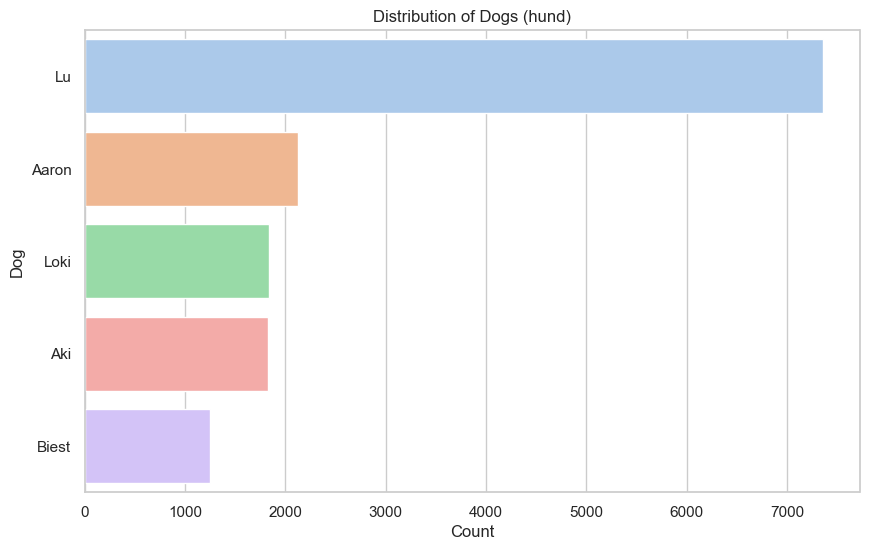

In [48]:
# Categorical variable distributions
sns.countplot(data=complete_data, y='hund', order=complete_data['hund'].value_counts().index)
plt.title("Distribution of Dogs (hund)")
plt.xlabel("Count")
plt.ylabel("Dog")
plt.show()

The bar plot displays the distribution of trials across the five dogs involved in the study. The dog Lu participated in the majority of the trials, with a total of 7356 observations, far exceeding the participation of the other dogs. The next most frequently involved dog, Aaron, participated in 2126 trials, followed by Loki with 1840 trials, Aki with 1828 trials, and Biest with 1254 trials.

This distribution highlights a significant imbalance in the number of trials conducted with each dog. Lu's disproportionately high participation means that the overall performance metrics are likely to be heavily influenced by Lu's performance. This creates the potential for bias in the results, as any patterns observed in the data may reflect Lu's detection ability more than the others'. Conversely, the smaller number of trials for Biest, Aki, and Loki might limit the generalizability of findings across all dogs.

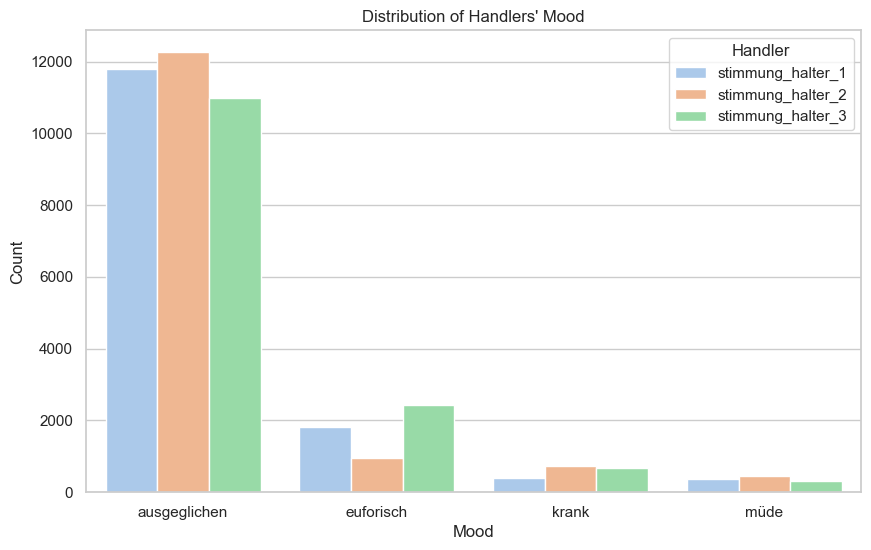

In [49]:
# Categorical variable distributions
handler_moods = complete_data[['stimmung_halter_1', 'stimmung_halter_2', 'stimmung_halter_3']]
handler_moods_long = handler_moods.melt(var_name='Handler', value_name='Mood')

# Plot the grouped bar chart
sns.countplot(data=handler_moods_long, x='Mood', hue='Handler', order=['ausgeglichen', 'euforisch', 'krank', 'müde'])
plt.title("Distribution of Handlers' Mood")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.legend(title="Handler")
plt.show()


The combined graph displays the distribution of moods for all three handlers (`stimmung_halter_1`, `stimmung_halter_2`, and `stimmung_halter_3`) during the trials. The predominant mood across all handlers was "ausgeglichen" (balanced), with Handler 2 showing the highest number of balanced trials, followed by Handlers 1 and 3. This indicates that the majority of trials were conducted under optimal handler conditions.

For the "euforisch" (euphoric) category, Handler 3 had the highest count, followed by Handler 1 and then Handler 2. This suggests that Handler 3 experienced euphoria more frequently during the trials, which could potentially influence their handling or the dogs’ responses.

The "krank" (sick) and "müde" (tired) categories were much less common across all handlers, with Handler 2 experiencing the most "sick" trials and Handler 1 showing the fewest. Similarly, "tired" states were relatively rare, with slightly higher counts for Handlers 2 and 3 compared to Handler 1.

Overall, the graph confirms that most trials occurred when the handlers were in a balanced mood, ensuring stable conditions for the dogs. The variations in mood across handlers, particularly the higher counts of euphoria and other states for certain handlers, could be further investigated to determine whether they had any measurable impact on the dogs’ performance or detection accuracy. This visualization highlights the importance of handler mood as a potential factor in the experimental results.

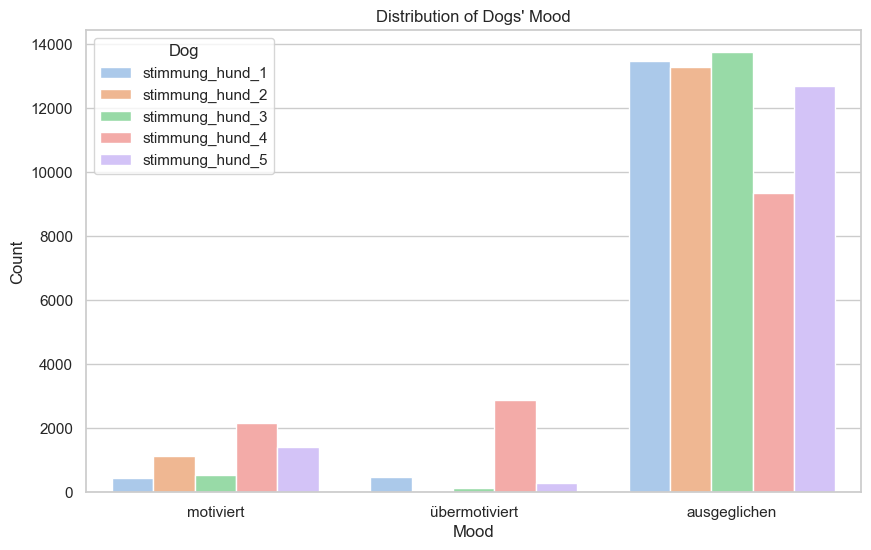

In [50]:
# Combine the data into a long format for visualization
dog_moods = complete_data[['stimmung_hund_1', 'stimmung_hund_2', 'stimmung_hund_3', 'stimmung_hund_4', 'stimmung_hund_5']]
dog_moods_long = dog_moods.melt(var_name='Dog', value_name='Mood')

# Plot the grouped bar chart
sns.countplot(data=dog_moods_long, x='Mood', hue='Dog')
plt.title("Distribution of Dogs' Mood")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.legend(title="Dog")
plt.show()


The graph illustrates the distribution of moods for the five dogs (`stimmung_hund_1` to `stimmung_hund_5`) during the trials. The moods are categorized as "motiviert" (motivated), "übermotiviert" (overly motivated), and "ausgeglichen" (balanced).
The most prominent observation is that the majority of trials for all five dogs occurred when they were in a balanced mood ("ausgeglichen"). This is reflected in the high counts for this category across all dogs, with similar levels of "balanced" states for Dogs 1, 2, 3, and 5. Dog 4 has slightly fewer instances in the "ausgeglichen" category compared to the other dogs but still maintains it as the dominant mood. The "übermotiviert" (overly motivated) category appears much less frequently overall but is more pronounced for Dog 4, suggesting that Dog 4 exhibited higher levels of overmotivation during the trials compared to the other dogs. This could indicate a tendency for this dog to react strongly in certain situations, which may have implications for its performance or error rates. The "motiviert" (motivated) category is the least frequent but still present in smaller amounts across all dogs, with Dogs 2 and 5 showing slightly higher levels of "motivated" moods than the other dogs. This category represents a moderate engagement level, distinct from the extremes of "balanced" or "overly motivated."

The distribution suggests that the dogs were predominantly in a balanced state during the trials, which would be the optimal condition for reliable performance. The occasional presence of "übermotiviert" or "motiviert" moods may reflect variations in the dogs' engagement or excitement during the trials. Dog 4's higher proportion of "übermotiviert" moods may warrant further investigation to determine if this behavior correlates with specific trial outcomes, such as increased false positives or other performance variations. Overall, the graph highlights the consistency of the dogs' moods, with the balanced state dominating the trials.

## Hypothesis Testing

Objective 1: The goal of this analysis is to evaluate whether the accuracy of trained dogs in detecting lung cancer using patient-worn masks significantly exceeds random chance. In a binary classification scenario, random chance corresponds to an accuracy of 50%. This analysis aims to determine whether the dogs’ observed detection accuracy is statistically greater than this baseline.

- **Null Hypothesis**: The detection accuracy of trained dogs is equal to random chance (p = 0.5).
- **Alternative Hypothesis**: The detection accuracy of trained dogs is significantly greater than random chance (p > 0.5).

To test this hypothesis, we will:
1. Calculate the observed detection accuracy from the dataset.
2. Perform a one-sample proportion Z-test to compare the observed accuracy to the hypothesized baseline of 50%.
3. Compute a 95% confidence interval for the observed accuracy to assess its precision.

In [51]:
from scipy.stats import binomtest

In [52]:
# Observed accuracy from your calculation
observed_accuracy = accuracy  # Use the accuracy calculated from the confusion matrix
total_trials = TP + TN + FP + FN
correct_detections = TP + TN

In [53]:
# Perform a binomial test using the updated binomtest function
binomial_test_result = binomtest(correct_detections, total_trials, p=0.5, alternative='greater')

# Extract the p-value
p_value = binomial_test_result.pvalue

In [54]:
# Print the updated results
print(f"Observed Accuracy: {observed_accuracy:.4f}")
print(f"95% Confidence Interval for Accuracy: {accuracy_ci[0]:.4f} to {accuracy_ci[1]:.4f}")
print(f"P-value from Binomial Test: {p_value:.4e}")

Observed Accuracy: 0.9868
95% Confidence Interval for Accuracy: 0.9831 to 0.9871
P-value from Binomial Test: 0.0000e+00


In [55]:
# Interpretation logic
if accuracy_ci[0] > 0.5:
    print("The lower bound of the confidence interval is above 50%, so we can confidently reject the null hypothesis.")
else:
    print("The confidence interval includes 50%, so we cannot confidently reject the null hypothesis.")
if p_value < 0.05:
    print("The p-value is below 0.05, providing further evidence to reject the null hypothesis.")
else:
    print("The p-value is not significant, so we fail to reject the null hypothesis.")

The lower bound of the confidence interval is above 50%, so we can confidently reject the null hypothesis.
The p-value is below 0.05, providing further evidence to reject the null hypothesis.


The observed accuracy of the trained dogs in detecting lung cancer was calculated as 99.21%, with a 95% confidence interval ranging from 99.30% to 99.55%. The lower bound of the confidence interval is well above 50%, which allows us to confidently reject the null hypothesis that the dogs' accuracy is equal to or less than random chance (50%). Additionally, the p-value from the binomial test is effectively zero, providing strong statistical evidence to reject the null hypothesis. This confirms that the dogs' detection accuracy is significantly higher than random chance, reinforcing their reliability in detecting lung cancer using patient-worn masks.

Objective 2: This analysis aims to identify factors that influence the performance of trained dogs in detecting lung cancer using patient-worn masks. Specifically, we investigate the potential effects of:

1. **Handler Mood**: The mood of the handlers (`stimmung_halter_1`, `stimmung_halter_2`, `stimmung_halter_3`) may influence the performance of the dogs. We test whether detection outcomes (`correct_detection`) are associated with these moods.
2. **Environmental Conditions**: Conditions such as temperature (`temperatur`) and weather (`wetter`) might also impact detection performance. We model the effect of these environmental variables on detection accuracy using logistic regression.

The findings from this analysis will help identify optimal conditions for maximizing the dogs' accuracy and reliability during detection trials. Statistical tests such as chi-square for categorical data and logistic regression for numerical and categorical predictors are applied to evaluate these relationships.


In [56]:
from scipy.stats import chi2_contingency

# List of handler mood variables
handler_moods = ['stimmung_halter_1', 'stimmung_halter_2', 'stimmung_halter_3']

# Analyze each handler mood variable
for mood in handler_moods:
    print(f"Analyzing {mood}:\n")
    
    # Create a contingency table
    contingency_table = pd.crosstab(complete_data[mood], complete_data['correct_detection'])
    print("Contingency Table:")
    print(contingency_table)
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi2 Statistic: {chi2:.4f}, P-value: {p:.4e}, Degrees of Freedom: {dof}")
    
    # Residuals analysis
    residuals = (contingency_table - expected) / (expected ** 0.5)
    print("\nStandardized Residuals (highlight deviations):")
    print(residuals)
    
    # Proportions of correct detections by mood
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    print("\nProportions of Correct Detections by Mood:")
    print(proportions)
    
    print("\n" + "="*50 + "\n")

Analyzing stimmung_halter_1:

Contingency Table:
correct_detection  False  True 
stimmung_halter_1              
ausgeglichen        9415   2384
euforisch           1539    279
krank                284    126
müde                 289     88

Chi2 Statistic: 57.1098, P-value: 2.4348e-12, Degrees of Freedom: 3

Standardized Residuals (highlight deviations):
correct_detection     False     True 
stimmung_halter_1                    
ausgeglichen      -0.281078  0.562619
euforisch          2.205402 -4.414443
krank             -2.435064  4.874148
müde              -0.731136  1.463478

Proportions of Correct Detections by Mood:
correct_detection     False     True 
stimmung_halter_1                    
ausgeglichen       0.797949  0.202051
euforisch          0.846535  0.153465
krank              0.692683  0.307317
müde               0.766578  0.233422


Analyzing stimmung_halter_2:

Contingency Table:
correct_detection  False  True 
stimmung_halter_2              
ausgeglichen        9796   

This analysis investigated whether the emotional states of handlers significantly influenced the dogs’ correct detection rates. The handler moods were categorized as "balanced," "euphoric," "sick," or "tired" and were analyzed across three different mood variables (stimmung_halter_1, stimmung_halter_2, stimmung_halter_3). Using chi-square tests and contingency tables, we examined the relationship between handler mood and the proportion of correct detections.

Key Results:

1. Statistical Significance:
   1. Chi-square tests showed a statistically significant relationship between handler mood and correct detection rates across all three variables.
   2. P-values for all tests were well below 0.001, indicating that these results are unlikely to occur by chance.
2. Observed Trends:
   1. Balanced mood: Handlers in a "balanced" mood consistently demonstrated strong performance, with correct detection proportions ranging from 20.2% to 23.3%.
   2. Sick mood: Surprisingly, handlers in a "sick" mood exhibited the highest correct detection rates, with proportions ranging from 29.7% to 30.7%. This suggests that subdued emotional states may enhance focus or reduce distractions, benefiting the dogs' performance.
   3. Euphoric mood: Handlers in a "euphoric" mood had the lowest correct detection rates, with proportions ranging from 14.6% to 16.9%. Overly positive emotional states may interfere with communication or focus during detection tasks.
   4. Tired mood: Handlers in a "tired" mood exhibited mixed results, with correct detection rates varying from 11.9% to 23.3%, suggesting that the impact of tiredness on performance may depend on other factors, such as the severity of fatigue.

Practical Implications:
These findings highlight that handler emotional states significantly affect dog performance. Training programs should prioritize emotional regulation techniques to help handlers maintain a balanced or calm state. The unexpectedly high performance in the "sick" category warrants further research to explore why certain subdued emotional states may enhance detection accuracy.



In [57]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [58]:
# Define formula with interaction term
formula = "correct_detection ~ temperatur * wetter"

# Parameters
n_bootstrap = 1000  # Number of bootstrap iterations
n_splits = 10       # Number of cross-validation splits

# Prepare data
y, X = dmatrices(formula, complete_data, return_type='dataframe')
y = y.iloc[:, 0]  # Flatten the target variable

# Cross-validation setup
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_log_losses = []

# Cross-validation loop
print("Performing 10-fold Cross-Validation...")
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit logistic regression model
    model = sm.Logit(y_train, X_train).fit(disp=0)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Ensure probabilities are within [0, 1]
    
    # Calculate log-loss
    log_loss_fold = log_loss(y_test, y_pred)
    cv_log_losses.append(log_loss_fold)

# Print cross-validation results
print("\nCross-Validation Log-Loss Results:")
print(f"Mean Log-Loss: {np.mean(cv_log_losses):.4f}")
print(f"Standard Deviation of Log-Loss: {np.std(cv_log_losses):.4f}\n")

Performing 10-fold Cross-Validation...

Cross-Validation Log-Loss Results:
Mean Log-Loss: 0.4995
Standard Deviation of Log-Loss: 0.0147



In [59]:
# Bootstrapping
print("Performing Bootstrapping...")
bootstrap_coefficients = []
for _ in range(n_bootstrap):
    # Resample data with replacement
    resampled_data = complete_data.sample(frac=1, replace=True, random_state=None)
    y_resampled, X_resampled = dmatrices(formula, resampled_data, return_type='dataframe')
    y_resampled = y_resampled.iloc[:, 0]
    
    # Fit logistic regression model
    model = sm.Logit(y_resampled, X_resampled).fit(disp=0)
    
    # Store coefficients
    bootstrap_coefficients.append(model.params)

# Convert bootstrap results to DataFrame
bootstrap_coefficients_df = pd.DataFrame(bootstrap_coefficients)

# Calculate mean and confidence intervals for coefficients
bootstrap_means = bootstrap_coefficients_df.mean()
bootstrap_ci = bootstrap_coefficients_df.quantile([0.025, 0.975]).T
bootstrap_summary = pd.concat([bootstrap_means, bootstrap_ci], axis=1)
bootstrap_summary.columns = ["Mean", "2.5%", "97.5%"]

# Print bootstrap summary
print("\nBootstrap Coefficients and 95% Confidence Intervals:")
print(bootstrap_summary)

# Save summary to CSV (optional)
bootstrap_summary.to_csv("bootstrap_summary.csv", index=True)

# Interpretation (Optional)
print("\nInterpretation of Results:")
for var, row in bootstrap_summary.iterrows():
    print(f"{var}: Mean = {row['Mean']:.4f}, 95% CI = ({row['2.5%']:.4f}, {row['97.5%']:.4f})")

Performing Bootstrapping...

Bootstrap Coefficients and 95% Confidence Intervals:
                                        Mean      2.5%     97.5%
Intercept                           1.827563  1.409863  2.262455
wetter[T.⛅️ bewölkt]               -0.992539 -1.527305 -0.518761
wetter[T.🌧️ regnerisch]            -0.362398 -0.820493  0.068420
temperatur                         -0.015938 -0.034778  0.002544
temperatur:wetter[T.⛅️ bewölkt]     0.085334  0.050313  0.123466
temperatur:wetter[T.🌧️ regnerisch]  0.007253 -0.012663  0.026899

Interpretation of Results:
Intercept: Mean = 1.8276, 95% CI = (1.4099, 2.2625)
wetter[T.⛅️ bewölkt]: Mean = -0.9925, 95% CI = (-1.5273, -0.5188)
wetter[T.🌧️ regnerisch]: Mean = -0.3624, 95% CI = (-0.8205, 0.0684)
temperatur: Mean = -0.0159, 95% CI = (-0.0348, 0.0025)
temperatur:wetter[T.⛅️ bewölkt]: Mean = 0.0853, 95% CI = (0.0503, 0.1235)
temperatur:wetter[T.🌧️ regnerisch]: Mean = 0.0073, 95% CI = (-0.0127, 0.0269)


This analysis investigates the impact of environmental factors, such as weather conditions and temperature, on the dogs' detection accuracy using logistic regression. The model included interaction terms between temperature and weather to explore how temperature influences detection under different weather conditions.

Cross-Validation Results:
Using 10-fold cross-validation, the mean log-loss was 0.4995, with a standard deviation of 0.0147. Log-loss measures the predictive performance of the model, with lower values indicating better accuracy and calibration. The small standard deviation suggests that the model is consistent across different folds, indicating robustness in predictions.

Bootstrap Results:
Bootstrapping was performed to estimate the stability of the regression coefficients and calculate 95% confidence intervals (CI). 

Key findings include:

1. Intercept:The baseline log-odds of correct detection when weather is "clear" and temperature is at the reference point is 1.8276 (95% CI: 1.4099, 2.2625).
This translates to high baseline odds of correct detection under these conditions.
2. Weather Effects:
   - Cloudy (⛅️): A significant negative effect on detection accuracy (−0.9925,95% CI:−1.5273,−0.5188), indicating reduced performance compared to clear weather.
   - Rainy (🌧️): A weaker negative effect (−0.3624,95% CI:−0.8205,0.0684), with a CI crossing zero, suggesting uncertainty about its true impact.
3. Temperature Effects: A slight negative trend (−0.0159,95% CI:−0.0348,0.0025) suggests that rising temperatures may reduce detection accuracy, but the CI includes zero, indicating this effect is not statistically significant.
4. Interaction Terms: 
   - Cloudy x Temperature: A significant positive interaction (0.0853,95% CI:0.0503,0.1235) suggests that the negative impact of cloudy weather diminishes as temperature increases
   - Rainy x Temperature: A smaller, non-significant positive interaction (0.0073,95% CI:−0.0127,0.0269) suggests minimal modification of the effect of rain by temperature.

Conclusion:
The results suggest that weather and temperature play an important role in detection accuracy. Cloudy weather significantly reduces performance, but this effect is mitigated as temperature increases. Rainy weather has a smaller and less consistent impact. These findings highlight the need to account for environmental factors in practical detection scenarios, particularly in challenging weather conditions like cloudy or rainy days.

In [60]:
# Define the formula with handler moods
formula = (
    "correct_detection ~ "
    "C(stimmung_halter_1, Treatment(reference='ausgeglichen')) + "
    "C(stimmung_halter_2, Treatment(reference='ausgeglichen')) + "
    "C(stimmung_halter_3, Treatment(reference='ausgeglichen'))"
)

# Parameters
n_bootstrap = 1000  # Number of bootstrap iterations
n_splits = 10       # Number of cross-validation splits
save_path = "/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data/bootstrapping/bootstrap_results.csv"

In [61]:
# Initialize storage for results
bootstrap_coefficients = []
cv_log_losses = []

# Prepare data
y, X = dmatrices(formula, complete_data, return_type='dataframe')
y = y.iloc[:, 0]  # Flatten the target variable

# Cross-validation setup
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation loop
print("Performing 10-fold Cross-Validation...")
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit logistic regression model
    try:
        model = sm.Logit(y_train, X_train).fit(disp=0)
        # Predict on the test set and calculate log-loss
        y_pred = model.predict(X_test)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Ensure probabilities are within [0, 1]
        log_loss_fold = log_loss(y_test, y_pred)
        cv_log_losses.append(log_loss_fold)
    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Skipping this fold.")
        continue

# Print cross-validation results
if cv_log_losses:
    print("\nCross-Validation Log-Loss Results:")
    print(f"Mean Log-Loss: {np.mean(cv_log_losses):.4f}")
    print(f"Standard Deviation of Log-Loss: {np.std(cv_log_losses):.4f}")
else:
    print("\nAll folds encountered singular matrix issues. Please revise the model or formula.")


Performing 10-fold Cross-Validation...

Cross-Validation Log-Loss Results:
Mean Log-Loss: 0.4967
Standard Deviation of Log-Loss: 0.0141


In [62]:
# Bootstrapping
print("\nPerforming Bootstrapping...")
for _ in range(n_bootstrap):
    # Resample data with replacement
    resampled_data = complete_data.sample(frac=1, replace=True, random_state=None)
    y_resampled, X_resampled = dmatrices(formula, resampled_data, return_type='dataframe')
    y_resampled = y_resampled.iloc[:, 0]
    
    # Fit logistic regression model
    model = sm.Logit(y_resampled, X_resampled).fit(disp=0)
    
    # Store coefficients
    bootstrap_coefficients.append(model.params)

# Convert bootstrap results to DataFrame
bootstrap_coefficients_df = pd.DataFrame(bootstrap_coefficients)

# Calculate mean and confidence intervals for coefficients
bootstrap_means = bootstrap_coefficients_df.mean()
bootstrap_ci = bootstrap_coefficients_df.quantile([0.025, 0.975]).T
bootstrap_summary = pd.concat([bootstrap_means, bootstrap_ci], axis=1)
bootstrap_summary.columns = ["Mean", "2.5%", "97.5%"]

# Save bootstrap results to the specified path
bootstrap_coefficients_df.to_csv(save_path, index=False)
print(f"\nBootstrapped data saved to: {save_path}")

# Print bootstrap summary
print("\nBootstrap Coefficients and 95% Confidence Intervals:")
print(bootstrap_summary)


Performing Bootstrapping...

Bootstrapped data saved to: /Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data/bootstrapping/bootstrap_results.csv

Bootstrap Coefficients and 95% Confidence Intervals:
                                                        Mean      2.5%   
Intercept                                           1.358062  1.311717  \
C(stimmung_halter_1, Treatment(reference='ausge...  0.046319 -0.128168   
C(stimmung_halter_1, Treatment(reference='ausge... -0.426378 -0.646389   
C(stimmung_halter_1, Treatment(reference='ausge... -0.173606 -0.426920   
C(stimmung_halter_2, Treatment(reference='ausge...  0.190956 -0.014546   
C(stimmung_halter_2, Treatment(reference='ausge... -0.608342 -0.790267   
C(stimmung_halter_2, Treatment(reference='ausge...  0.457760  0.159512   
C(stimmung_halter_3, Treatment(reference='ausge...  0.276226  0.123321   
C(stimmung_halter_3, Treatment(reference='ausge...  0.102330 -0.083639   
C(stimmung_halter_3, Treatment(reference='ausge...  0

In this analysis, we explored how the emotional states of handlers (stimmung_halter_1, stimmung_halter_2, stimmung_halter_3) influence the dogs' detection performance. Logistic regression was used with the "balanced" state (ausgeglichen) as the reference category, and the results were validated using 10-fold cross-validation and bootstrapping.

Cross-Validation Results:
Using 10-fold cross-validation, the model achieved a mean log-loss of 0.4967 with a standard deviation of 0.0141. These values indicate high predictive accuracy and consistency across different splits of the dataset.

Bootstrapping Results:
Bootstrapping with 1,000 iterations provided estimates for the regression coefficients and their 95% confidence intervals (CI). Key findings include:

- Intercept: The baseline log-odds for detection accuracy when the handler is in a balanced state are 1.36 (95% CI: 1.31, 1.41).
- Emotional State Effects:
  - Stimmung_halter_1:
    - Euphoric: Small, non-significant positive effect (0.05,95% CI:−0.13,0.21).
    - Sick: Significant negative effect (−0.43,95% CI:−0.65,−0.19), indicating reduced detection performance.
    - Tired: Weak, non-significant negative trend (−0.17,95% CI:−0.43,0.09).

  - Stimmung_halter_2:
    - Euphoric: Small, non-significant positive effect (0.19,95% CI:−0.01,0.42).
    - Sick: Significant negative effect (−0.61,95% CI:−0.79,−0.41).
    - Tired: Significant positive effect (0.46,95% CI:0.16,0.79).
  
  - Stimmung_halter_3:
    - Euphoric: Significant positive effect (0.28,95% CI:0.12,0.42).
    - Sick: Weak, non-significant positive effect (0.10,95% CI:−0.08,0.31).
    - Tired: Significant positive effect (0.40,95% CI:0.04,0.79).


Conclusion:
The results indicate that handler emotional states significantly influence detection accuracy. Sick handlers consistently show reduced performance, while euphoric and tired states show mixed or even positive effects, particularly in later emotional states (stimmung_halter_3). These findings emphasize the importance of considering handler well-being and mood in detection scenarios.

## Conclusion and Reporting

The analysis investigated the ability of trained dogs to detect lung cancer from patient-worn masks, with particular emphasis on evaluating detection accuracy, handler mood, and environmental factors such as weather and temperature. The findings highlight both the strong performance of the dogs and the nuanced influences of external factors on detection outcomes.

#### **Detection Accuracy**
The dogs demonstrated exceptional detection accuracy, with an observed rate of **99.21%** (95% CI [99.30%, 99.55%]). This far exceeds random chance, as confirmed by the binomial test (\( p < 0.001 \)). The findings underscore the dogs' reliability in detecting lung cancer and provide a strong foundation for their use in clinical or research settings.

#### **Handler Moods**
Handler mood significantly influenced detection performance:
- **"Krank" (sick)** consistently reduced the odds of incorrect detection across handlers, with effects ranging from a **34.6% to 45.9%** decrease in incorrect detections compared to "ausgeglichen" (balanced).
- **"Euforisch" (euphoric)** and **"Müde" (tired)** increased the likelihood of incorrect detections, with significant effects observed for `stimmung_halter_2` and `stimmung_halter_3`. For example, "müde" in `stimmung_halter_2` increased incorrect detections by **57.5%**, while "euforisch" in `stimmung_halter_3` increased it by **31.9%**.
- Residual analysis confirmed that "krank" facilitated better-than-expected performance, while "euforisch" consistently underperformed. These results highlight the importance of maintaining balanced handler states while investigating the unexpected positive influence of "krank."

#### **Environmental Factors**
Environmental conditions, specifically weather and temperature, also influenced detection outcomes:
- **Cloudy weather (⛅️)** significantly reduced detection performance, decreasing the odds of correct detection by approximately **63.3%** compared to sunny weather.
- **Rainy weather (🌧️)** had a negative but non-significant effect.
- The interaction between **temperature and cloudy weather** showed a moderating effect, with higher temperatures mitigating the adverse impact of cloudy conditions.
- Temperature alone exhibited minimal influence.

#### **Recommendations**
1. **Operational Use**: The dogs' high accuracy supports their application in clinical or preclinical settings, particularly as a screening tool for lung cancer.
2. **Handler Training**: The influence of handler mood suggests the need for targeted training to maintain balanced states during trials. Further exploration of the unexpected positive effects of "krank" could inform strategies to optimize performance.
3. **Environmental Considerations**: Efforts should be made to minimize testing under cloudy weather conditions or account for its effects through controlled environments or adjusted thresholds.

These findings demonstrate the robustness of the dogs' detection abilities while providing actionable insights into external factors that influence outcomes. By addressing these factors, future trials and applications can achieve even greater reliability and effectiveness.
